<a href="https://colab.research.google.com/github/andreavazquezt/ProyectoIntegrador/blob/main/Avance2_Equipo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

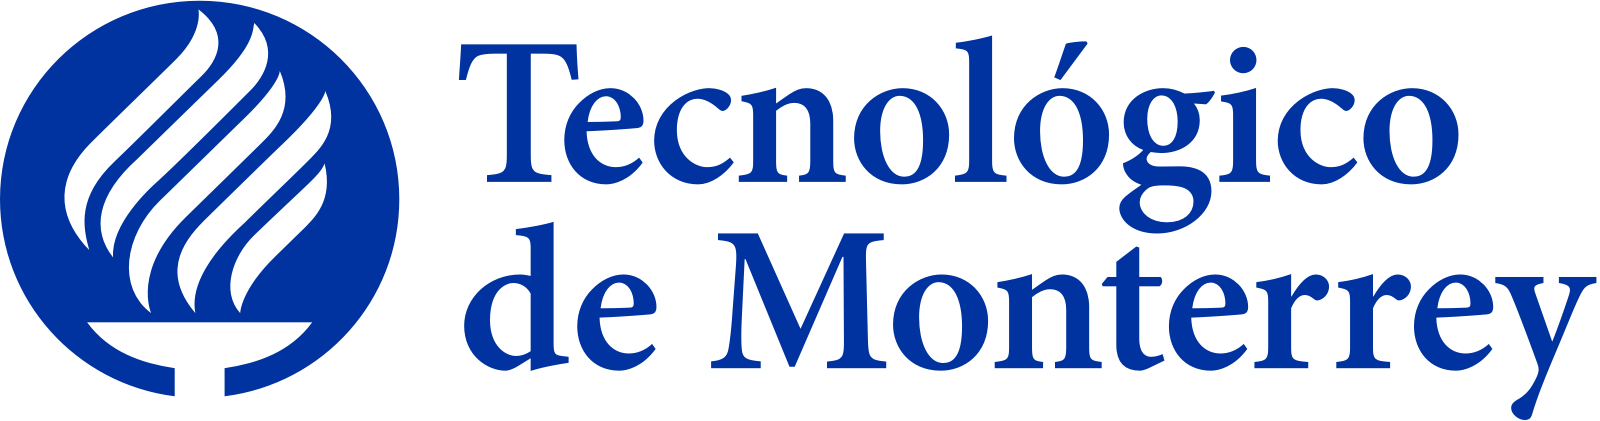

**Andrea Vazquez Tadeo A01730613**

**Hector Manuel Gonzalez Villareal A00178679**

**Karina Zafra Vallejo A01793979**

# Construcción

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from scipy import stats as sts

In [ ]:
#Generación de nuevas características

# Normalización

Obtenemos y limpiamos los datos, para este ejemplo usaremos la columna 2010 population

In [ ]:
dforiginal = pd.read_csv("sample_data/world_population.csv")
df = dforiginal[['2010 Population']]
df=df.interpolate(method ='linear', limit_direction ='forward')
fd=df.dropna()
df.isnull()

,2010 Population,2020 Population
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
229,False,False
230,False,False
231,False,False
232,False,False


Normalizamos los datos para que tengamos todas las variables con las mismas dimensiones, en este caso usamos una transformacion de normalizacion, pero pudimos haber utilizado un min max o alguna otra.

In [ ]:
datos_normalizados = preprocessing.Normalizer().transform(df.T)
datos_normalizados = datos_normalizados.T
datos2 = pd.DataFrame(datos_normalizados, columns=["2010 Population"])



Graficamos los datos originales y nos damos cuenta que tienes un sesgo altamente positivo

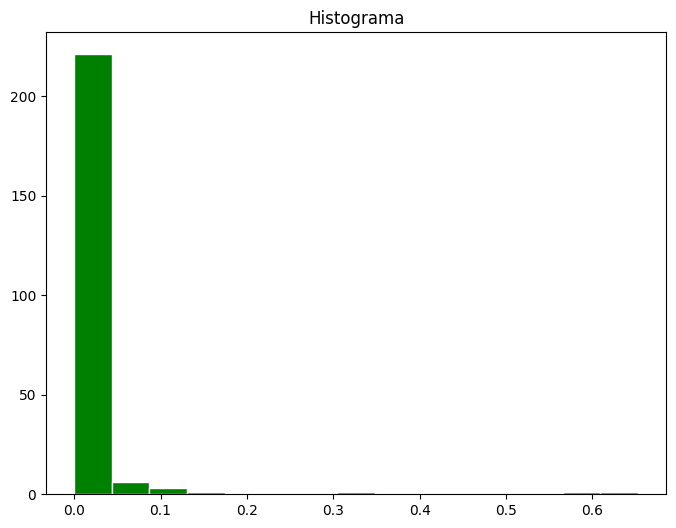

In [ ]:
fig, ax=plt.subplots(figsize=(8,6))
ax=plt.hist(datos2['2010 Population'],bins=15,color='g',edgecolor='w')
plt.title('Histograma')
plt.show()

Hacemos 4 transformaciones,una de raiz cuadrada, otra exponencial, una logaritmica y otra reciproca. dentro de estas 4 la unica que tiene un buen resultado al normalizar los datos es la logaritimica

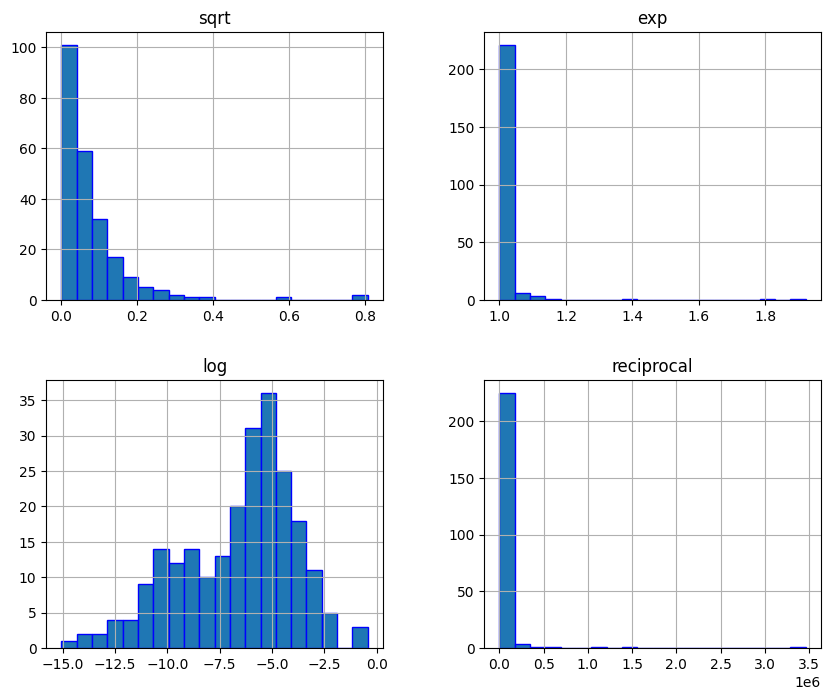

In [ ]:
transformaciones = datos2['2010 Population'].transform([np.sqrt,np.exp,np.log,np.reciprocal])
transformaciones.hist(bins=20,layout=(2,2),edgecolor='b',figsize=(10,8))
plt.show()

El metodo box cox es posible utilizarlo porque solo hay datos positivos y tambien tiene una busna normalziación

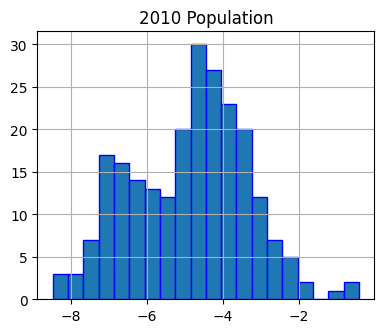

In [ ]:
boxcoxdata,lambdas = sts.boxcox(datos2['2010 Population'])
datosbox = pd.DataFrame(boxcoxdata, columns=["2010 Population"])
datosbox.hist(bins=20,layout=(2,2),edgecolor='b',figsize=(10,8))
plt.show()

El metodos yeo johnson no hace una buena normalizacion en estos datos

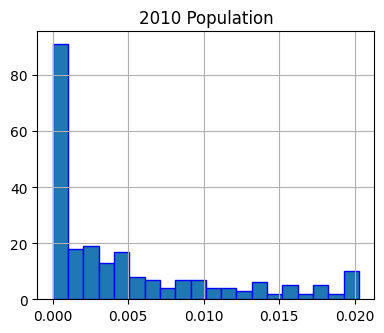

In [ ]:
yeodata,lambday = sts.yeojohnson(datos2['2010 Population'])
datosyeo = pd.DataFrame(yeodata, columns=["2010 Population"])
datosyeo.hist(bins=20,layout=(2,2),edgecolor='b',figsize=(10,8))
plt.show()

# Selección / extracción

In [ ]:
#Análisis de componentes principales (PCA)

# Conclusiones

De la fase de "Preparación de los datos" en el contexto de la metodología CRISP-ML.